In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import andrews_curves
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [4]:
Titanic = pd.read_csv("C:/Users/ABHISHEK/Documents/Titanic_Survivor.csv")
Titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
Titanic.shape

(891, 12)

In [6]:
Titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
Titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
Titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
rows_with_null = Titanic[Titanic.isnull().any(axis=1)]
print(rows_with_null)

     PassengerId  Survived  Pclass                                      Name  \
0              1         0       3                   Braund, Mr. Owen Harris   
2              3         1       3                    Heikkinen, Miss. Laina   
4              5         0       3                  Allen, Mr. William Henry   
5              6         0       3                          Moran, Mr. James   
7              8         0       3            Palsson, Master. Gosta Leonard   
..           ...       ...     ...                                       ...   
884          885         0       3                    Sutehall, Mr. Henry Jr   
885          886         0       3      Rice, Mrs. William (Margaret Norton)   
886          887         0       2                     Montvila, Rev. Juozas   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch        

In [91]:
Titanic=Titanic.drop('Cabin',axis = 1)

KeyError: "['Cabin'] not found in axis"

In [85]:
Titanic=Titanic.drop('Ticket',axis = 1)

In [86]:
Titanic=Titanic.drop('Name',axis = 1)

In [87]:
Titanic=Titanic.drop('PassengerId',axis = 1)

In [88]:
Titanic.replace({'Embarked':{'S':0,'C':1,'Q':2}},inplace = True)

C:\Users\ABHISHEK\AppData\Local\Temp\ipykernel_572\4241599825.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Titanic.replace({'Embarked':{'S':0,'C':1,'Q':2}},inplace = True)


In [89]:
Titanic.replace({'Sex':{'male':0,'female':1}},inplace = True)

C:\Users\ABHISHEK\AppData\Local\Temp\ipykernel_572\1727448613.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Titanic.replace({'Sex':{'male':0,'female':1}},inplace = True)


<Axes: >

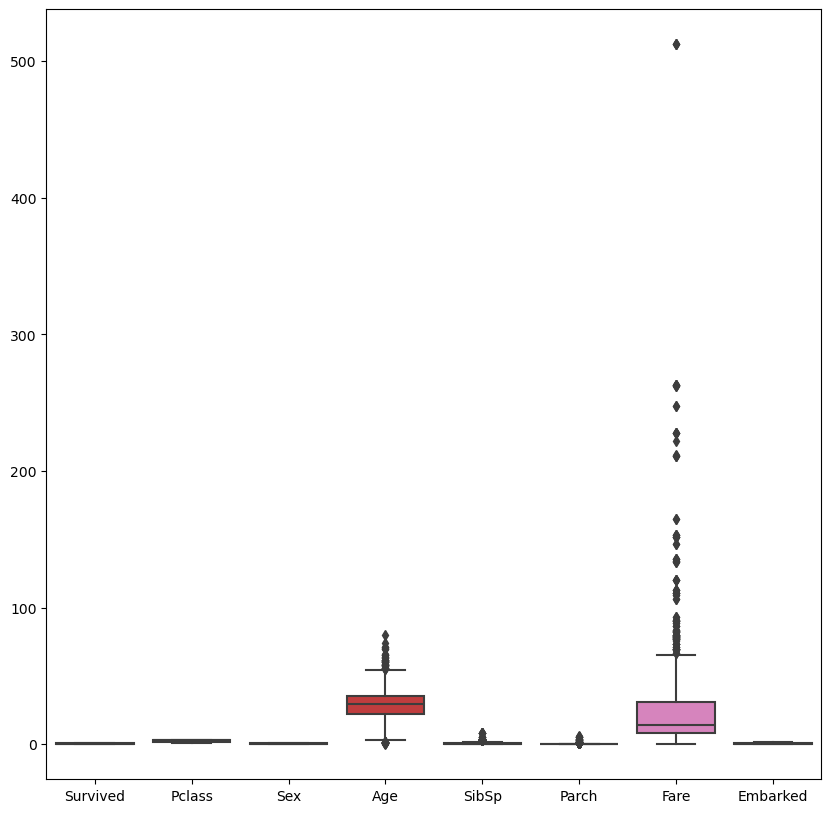

In [74]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(Titanic, ax=ax)

In [75]:
Q1 = Titanic.quantile(0.25)
Q3 = Titanic.quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1




# Define the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a mask for data within the IQR boundaries
mask = ~((Titanic < lower_bound) | (Titanic > upper_bound)).any(axis=1)

# Remove outliers
cleaned_data = Titanic[mask]

<Axes: >

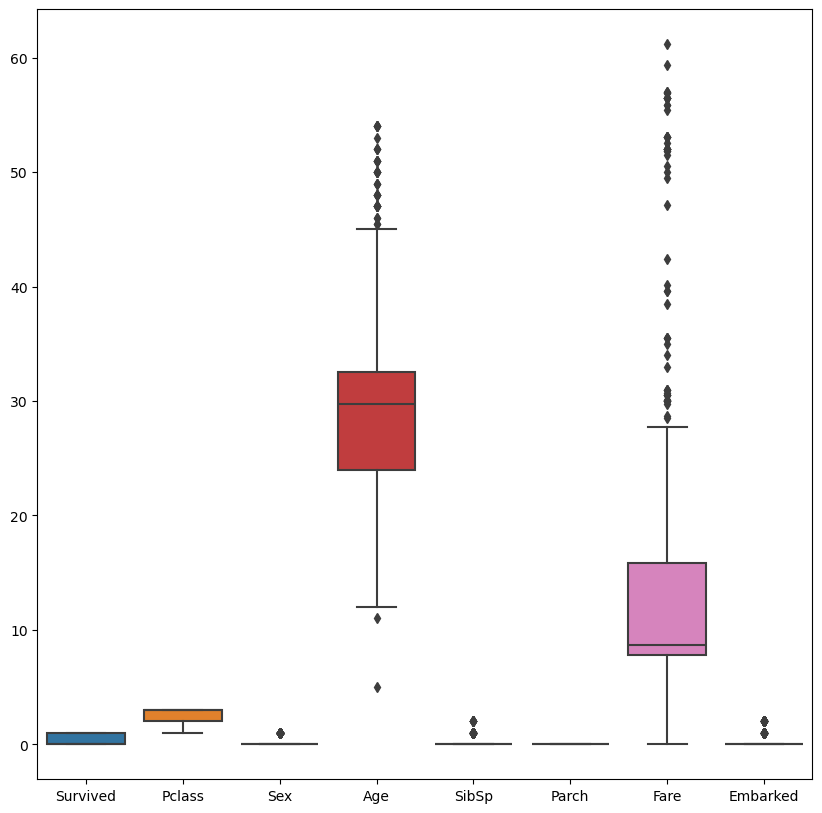

In [76]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(cleaned_data, ax=ax)

In [77]:
cleaned_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

C:\Users\ABHISHEK\AppData\Local\Temp\ipykernel_572\2827926749.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Titanic['Age'])
C:\Users\ABHISHEK\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Density'>

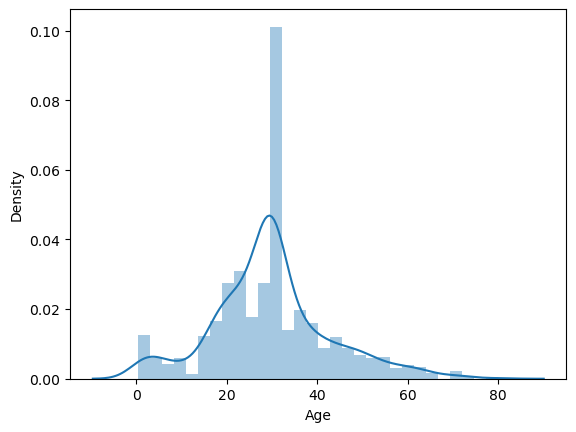

In [70]:
sns.distplot(Titanic['Age'])

C:\Users\ABHISHEK\AppData\Local\Temp\ipykernel_572\3726102149.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Titanic['Embarked'])
C:\Users\ABHISHEK\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Embarked', ylabel='Density'>

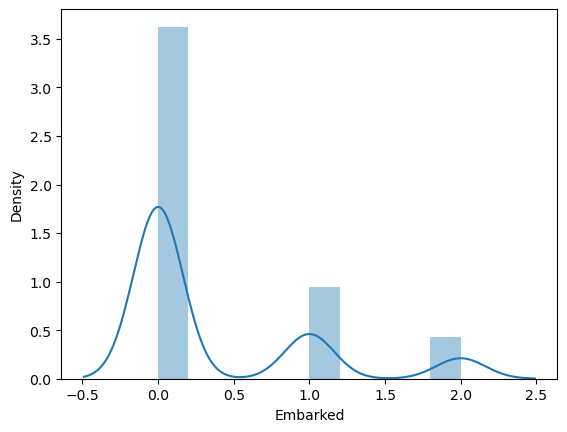

In [71]:
sns.distplot(Titanic['Embarked'])

In [9]:
Titanic['Age'].fillna(Titanic['Age'].mean(),inplace = True)

C:\Users\ABHISHEK\AppData\Local\Temp\ipykernel_572\3068414709.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Titanic['Age'].fillna(Titanic['Age'].mean(),inplace = True)


In [10]:
Titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [67]:
Titanic['Embarked'].fillna(Titanic['Embarked'].mode()[0], inplace=True)

C:\Users\ABHISHEK\AppData\Local\Temp\ipykernel_572\1397732295.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Titanic['Embarked'].fillna(Titanic['Embarked'].mode()[0], inplace=True)


In [68]:
Titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [14]:
Titanic['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: >

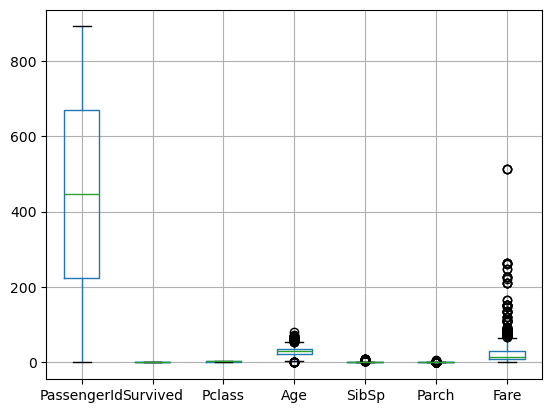

In [15]:
Titanic.boxplot()

In [16]:
Titanic.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [17]:
q1 = Titanic.Fare.quantile(0.25)
q1

7.9104

In [18]:
q3 = Titanic.Fare.quantile(0.75)
q3

31.0

In [19]:
iqr = q3-q1
iqr

23.0896

In [20]:
lower_limit = q1-1.5*iqr
lower_limit

-26.724

In [21]:
upper_limit = q3+1.5*iqr
upper_limit

65.6344

In [22]:
Titanic[(Titanic.Fare<lower_limit)|(Titanic.Fare>upper_limit)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.000000,3,2,19950,263.0000,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,29.699118,1,0,PC 17569,146.5208,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.000000,1,0,PC 17604,82.1708,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.000000,1,0,PC 17572,76.7292,C
...,...,...,...,...,...,...,...,...,...,...,...
846,847,0,3,"Sage, Mr. Douglas Bullen",male,29.699118,8,2,CA. 2343,69.5500,S
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,29.699118,1,0,17453,89.1042,C
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.000000,1,1,36928,164.8667,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,29.699118,8,2,CA. 2343,69.5500,S


In [23]:
Titanic['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [24]:
Titanic.replace({'Sex':{'male':0,'female':1}},inplace = True)

C:\Users\ABHISHEK\AppData\Local\Temp\ipykernel_572\1727448613.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Titanic.replace({'Sex':{'male':0,'female':1}},inplace = True)


In [25]:
Titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


In [26]:
Titanic['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [27]:
Titanic.replace({'Embarked':{'S':0,'C':1,'Q':2}},inplace = True)

C:\Users\ABHISHEK\AppData\Local\Temp\ipykernel_572\4241599825.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Titanic.replace({'Embarked':{'S':0,'C':1,'Q':2}},inplace = True)


In [28]:
Titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0.0


In [29]:
x = Titanic.drop(['Survived','Name','PassengerId','Ticket'],axis=1)
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.000000,1,0,7.2500,0.0
1,1,1,38.000000,1,0,71.2833,1.0
2,3,1,26.000000,0,0,7.9250,0.0
3,1,1,35.000000,1,0,53.1000,0.0
4,3,0,35.000000,0,0,8.0500,0.0
...,...,...,...,...,...,...,...
886,2,0,27.000000,0,0,13.0000,0.0
887,1,1,19.000000,0,0,30.0000,0.0
888,3,1,29.699118,1,2,23.4500,0.0
889,1,0,26.000000,0,0,30.0000,1.0


In [30]:
y = Titanic['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [31]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2,random_state = 2)

In [32]:
x.shape,xtrain.shape,xtest.shape,y.shape,ytrain.shape,ytest.shape

((891, 7), (712, 7), (179, 7), (891,), (712,), (179,))

In [33]:
model = LogisticRegression()

In [34]:
model.fit(xtest,ytest)

C:\Users\ABHISHEK\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
x_train_predict = model.predict(xtest)
x_train_predict

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1], dtype=int64)

In [36]:
train_data_accuracy = accuracy_score(x_train_predict,ytest)
print('accuracy of tr_data:',train_data_accuracy)

accuracy of tr_data: 0.770949720670391


In [37]:
x_test_predict = model.predict(xtest)

In [38]:
test_data_accuracy = accuracy_score(x_test_predict,ytest)
print('accuracy of tst_data:',test_data_accuracy)

accuracy of tst_data: 0.770949720670391


In [39]:
confm = confusion_matrix(x_test_predict,ytest)
confm

array([[80, 21],
       [20, 58]], dtype=int64)

In [40]:
print(classification_report(x_test_predict,ytest))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80       101
           1       0.73      0.74      0.74        78

    accuracy                           0.77       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.77      0.77      0.77       179

